In [69]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from platform import python_version
from platform import python_version

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

In [70]:
entry_phase_color_map_val = [1, 2, 3, 4, 5]
entry_phase_color_map = ListedColormap(['red', 'green', 'blue', 'orange', 'purple'])

In [71]:
data_entry = pd.read_csv('entry_dump.csv')

#data_entry = pd.read_csv('entry_dump_entryg_edwards.csv')


data_entry['time'] = data_entry['dtegd'].cumsum()


data_entry.head()

data_entry.dtypes

,dtegd,tgtsite,alpha,delaz,drag,egflg,hls,lod,rdot,gamma,...,tran5f_nom,tran5f_vtran,tran3f_vb1,tran3f_drefp4,tran4f_alfm,tran4f_drefp4,tgtsite0,dummy,Unnamed: 135,time
0,0.56,Edwards,39.977461,5.709786,0.341269,0,329418.789064,0.445987,-522.970364,-1.214402,...,False,False,False,False,False,False,Edwards,0,NaN,0.56
1,0.56,Edwards,40.024032,5.709754,0.347056,0,329125.991640,0.446306,-522.730400,-1.213838,...,False,False,False,False,False,False,Edwards,0,NaN,1.12
2,0.56,Edwards,40.065724,5.709723,0.353206,0,328833.329742,0.446327,-522.488434,-1.213269,...,False,False,False,False,False,False,Edwards,0,NaN,1.68
3,0.56,Edwards,40.101236,5.709694,0.359490,0,328540.804621,0.446309,-522.244191,-1.212696,...,False,False,False,False,False,False,Edwards,0,NaN,2.24
4,0.56,Edwards,40.122114,5.709672,0.364893,0,328248.418201,0.447168,-521.997509,-1.212116,...,False,False,False,False,False,False,Edwards,0,NaN,2.80


dtegd            float64
tgtsite           object
alpha            float64
delaz            float64
drag             float64
                  ...   
tran4f_drefp4       bool
tgtsite0          object
dummy              int64
Unnamed: 135     float64
time             float64
Length: 137, dtype: object

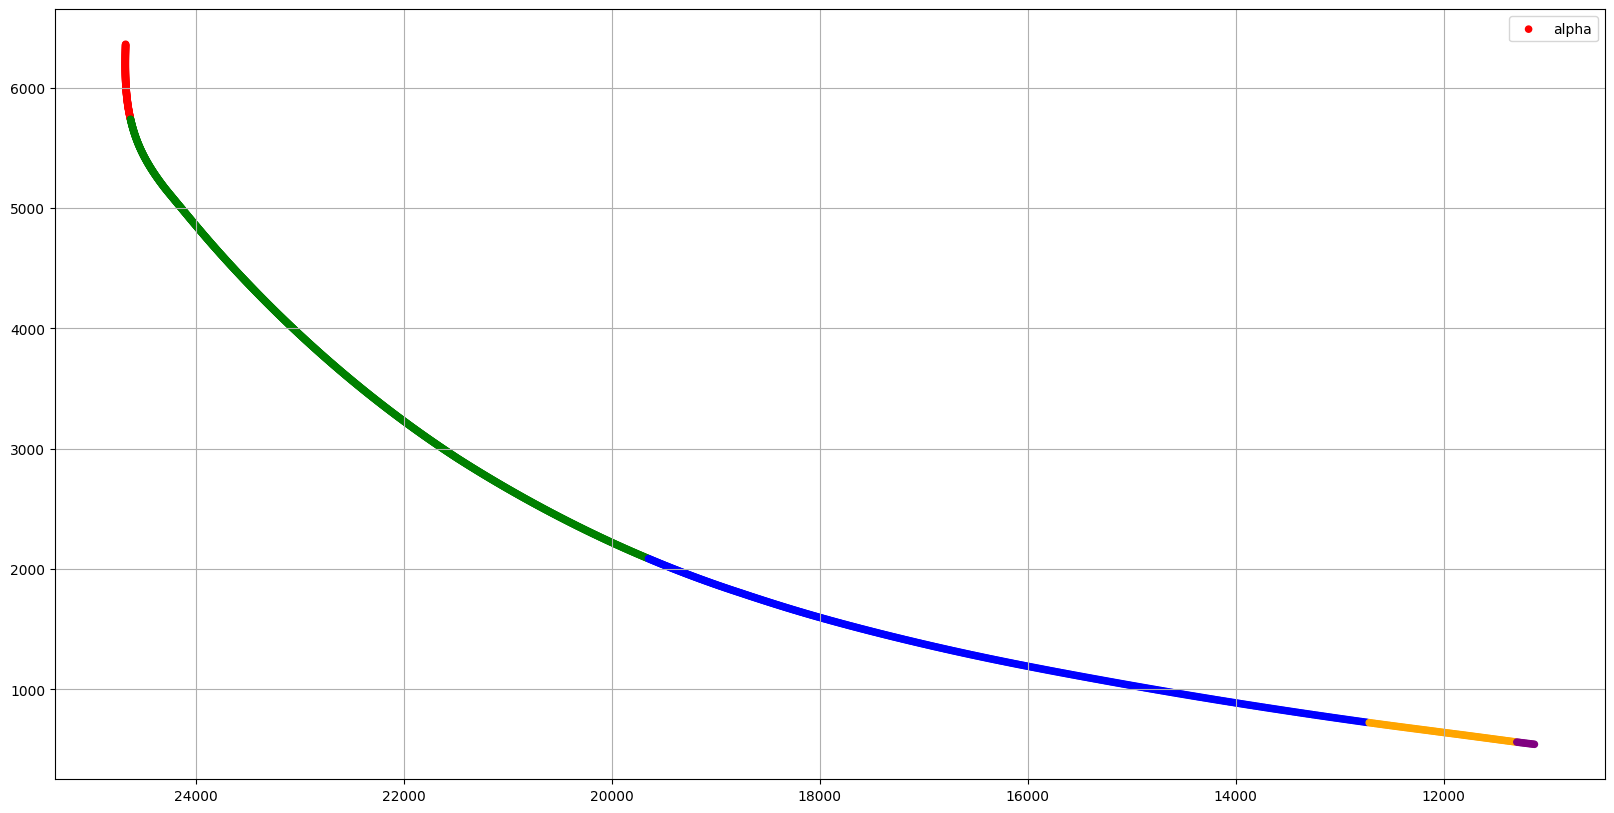

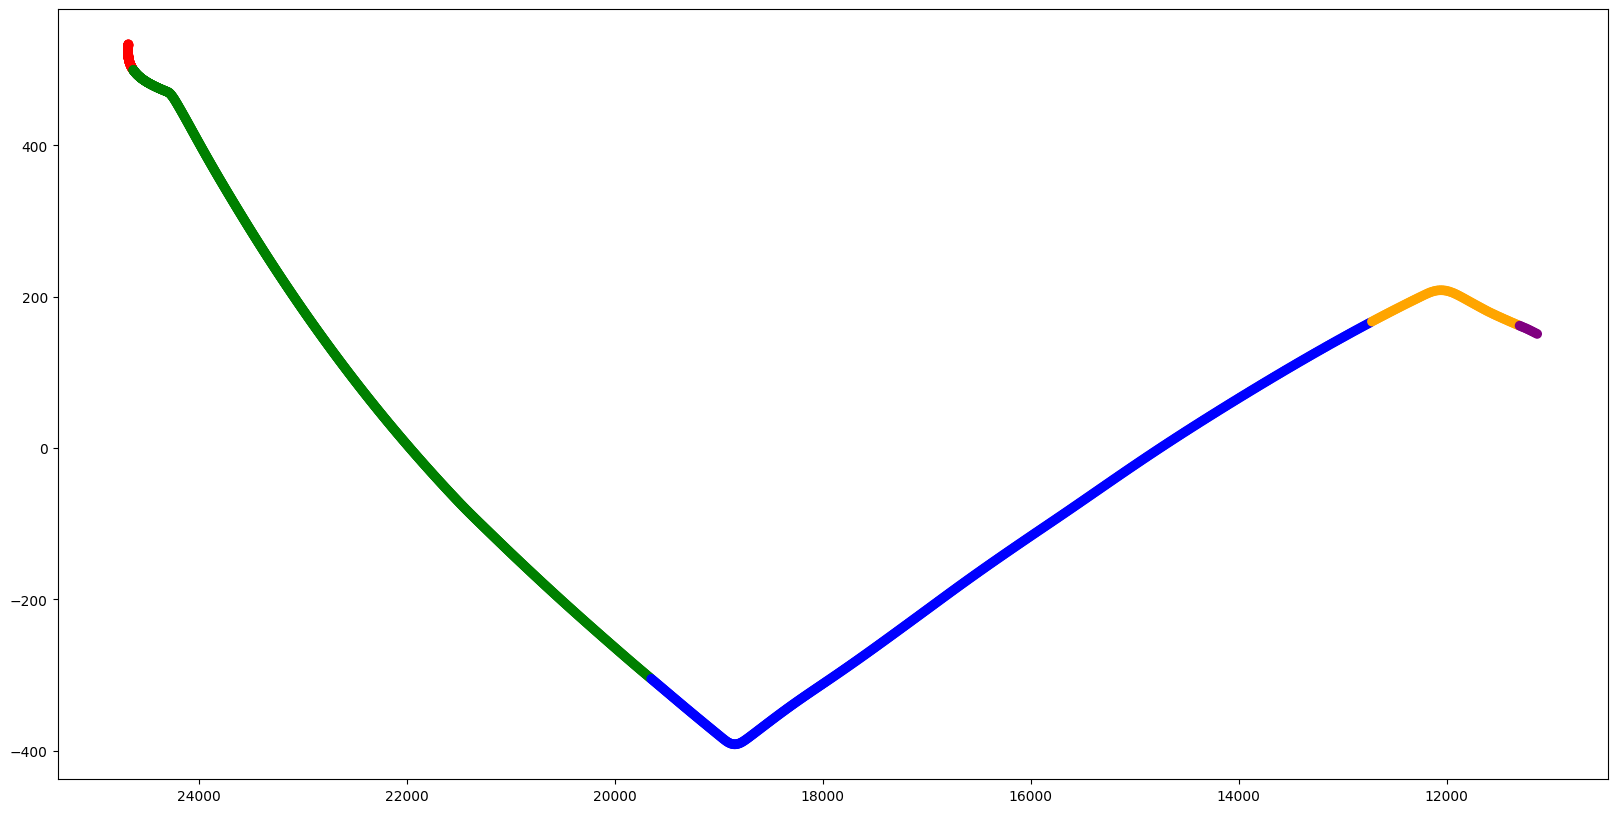

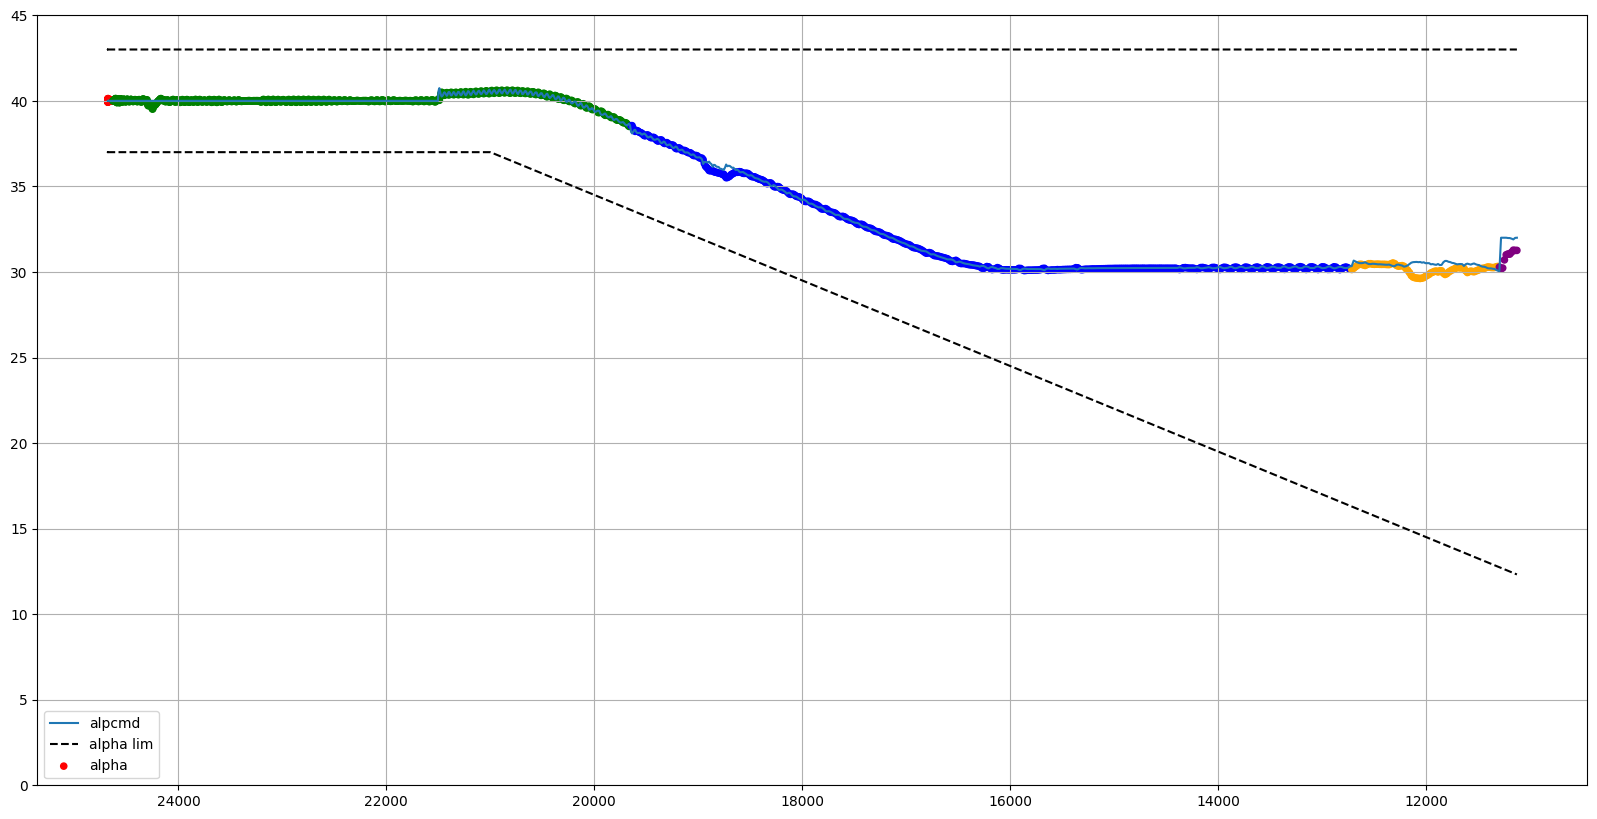

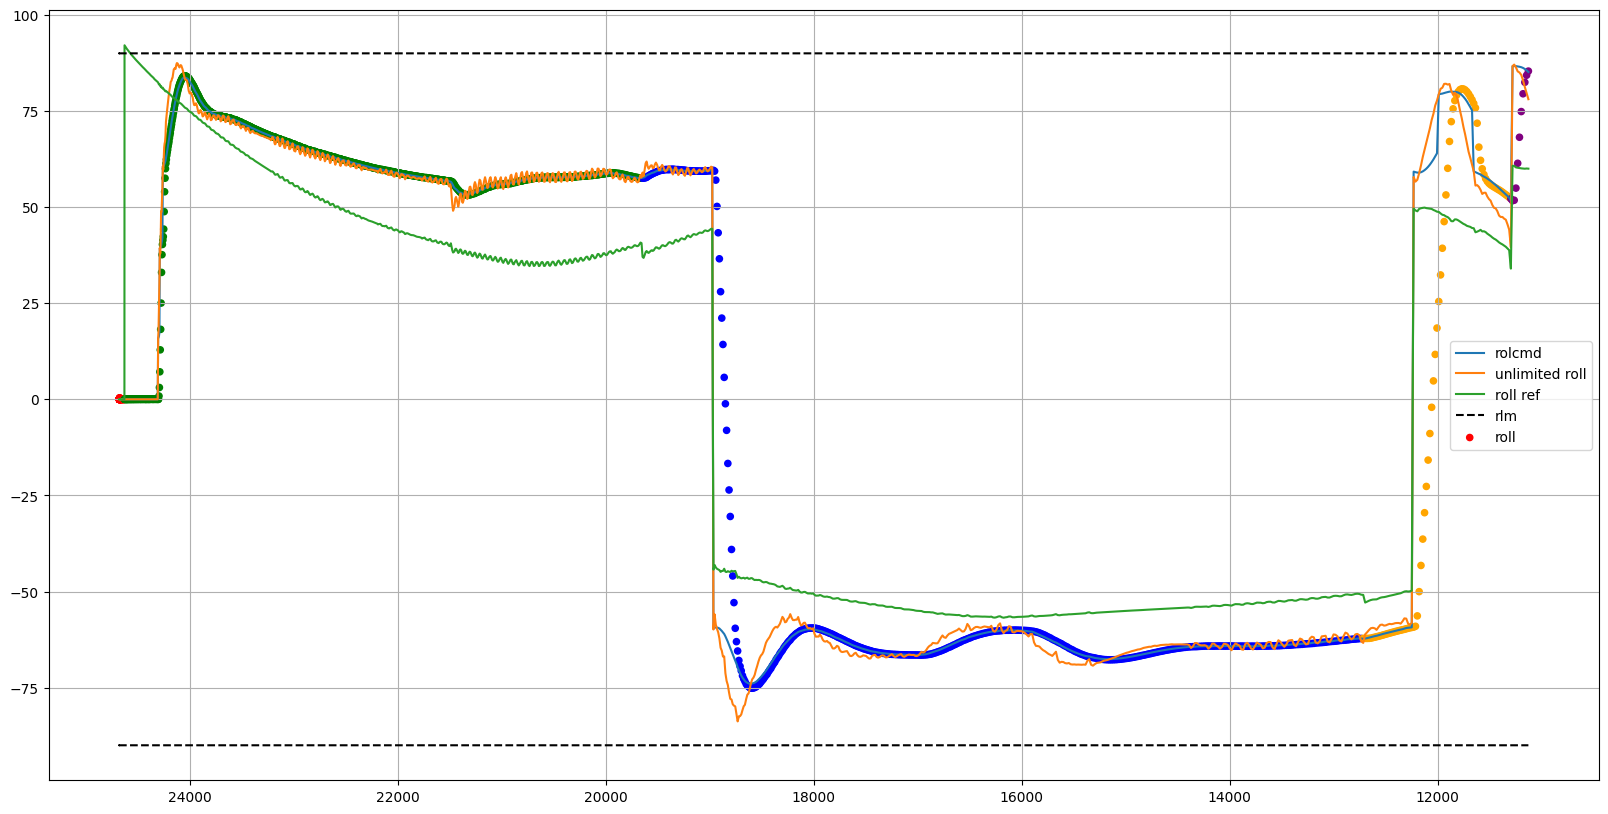

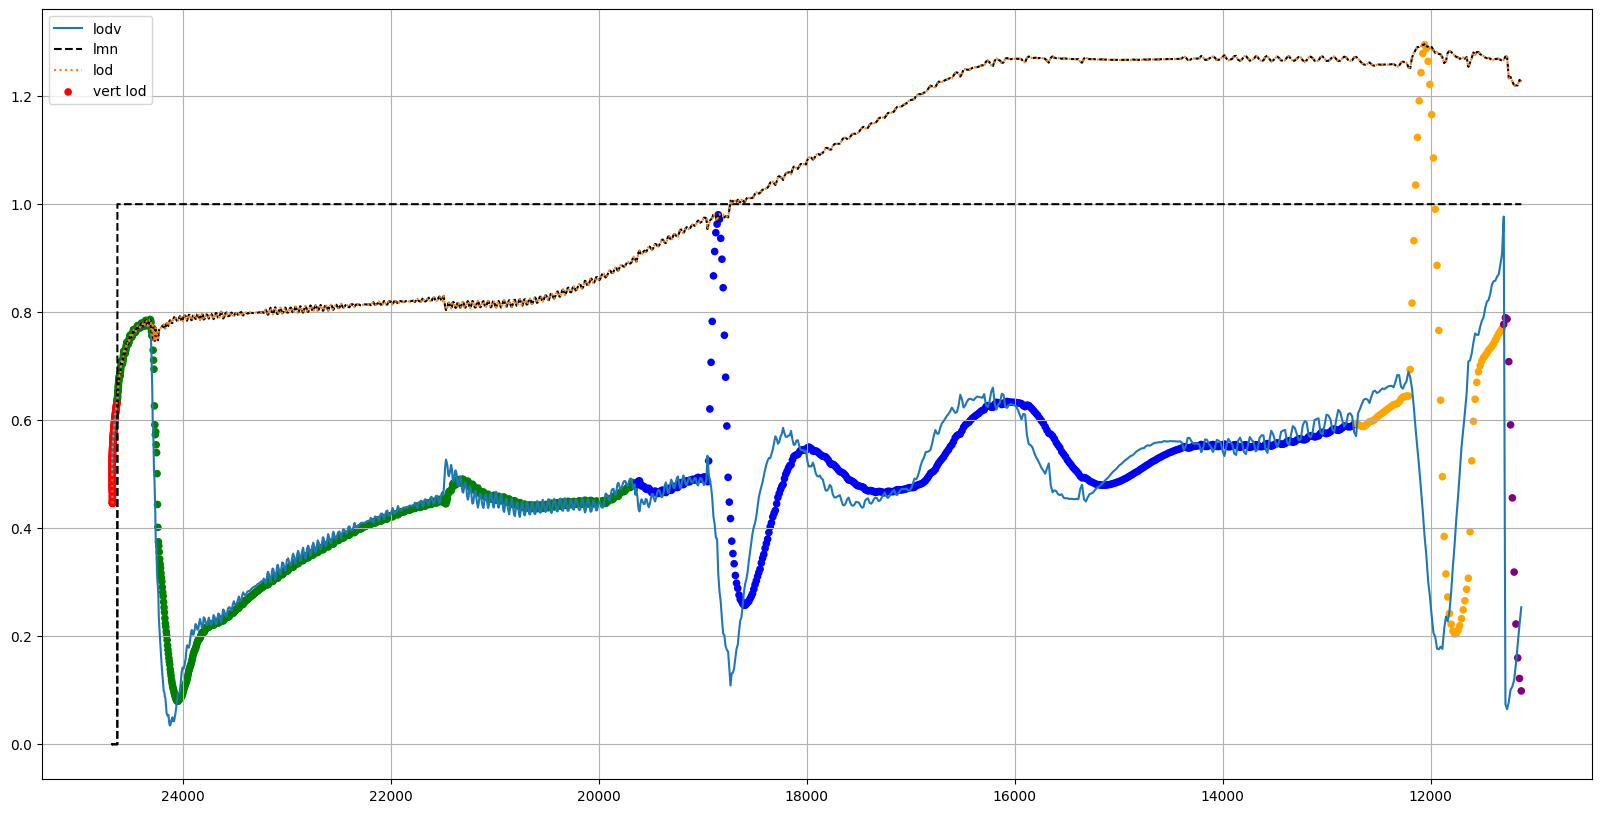

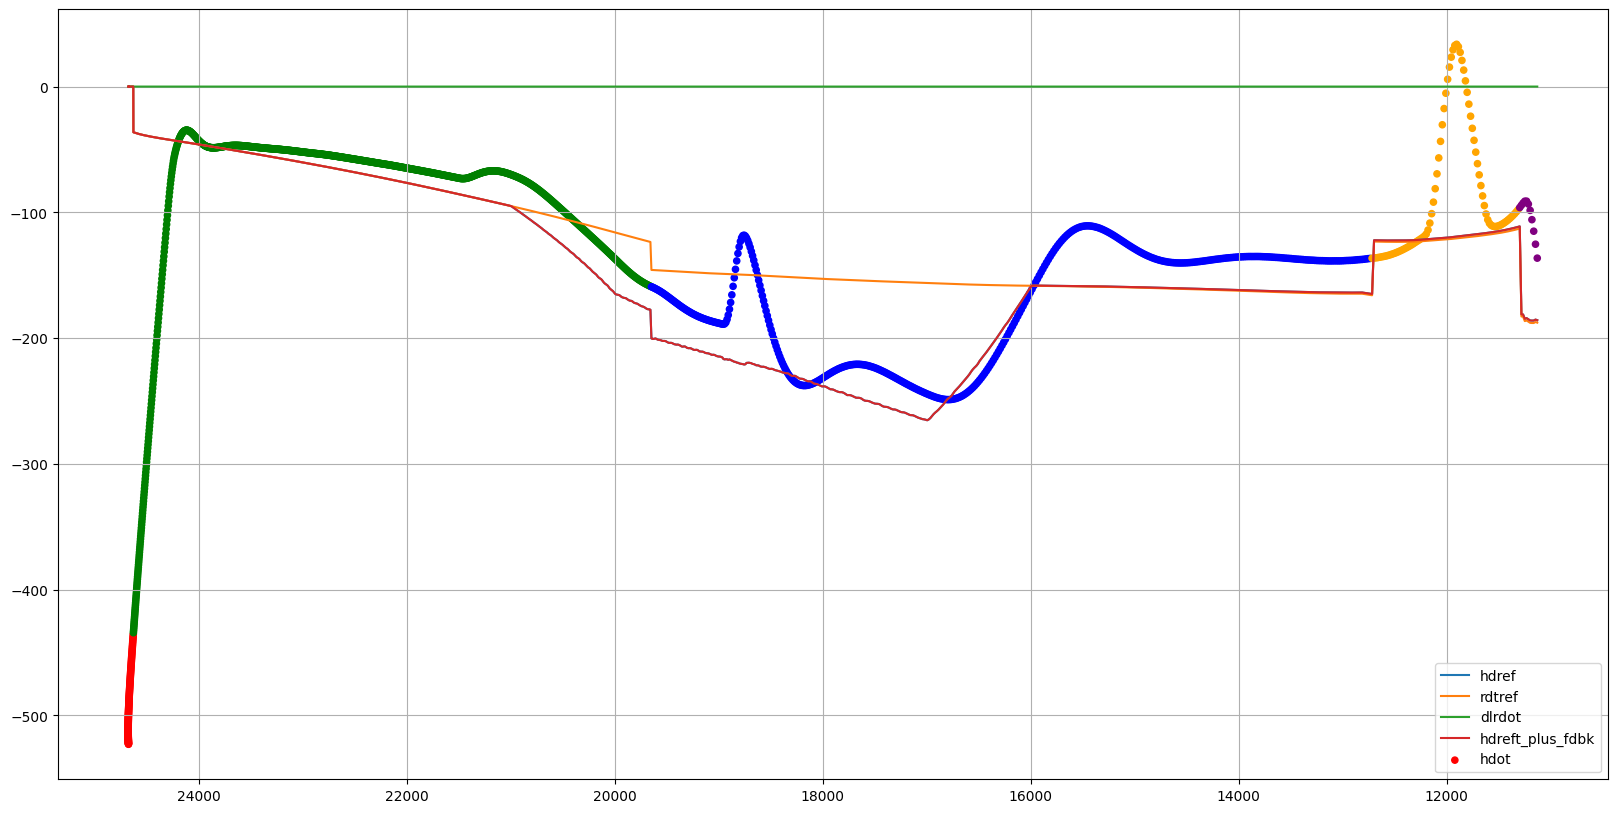

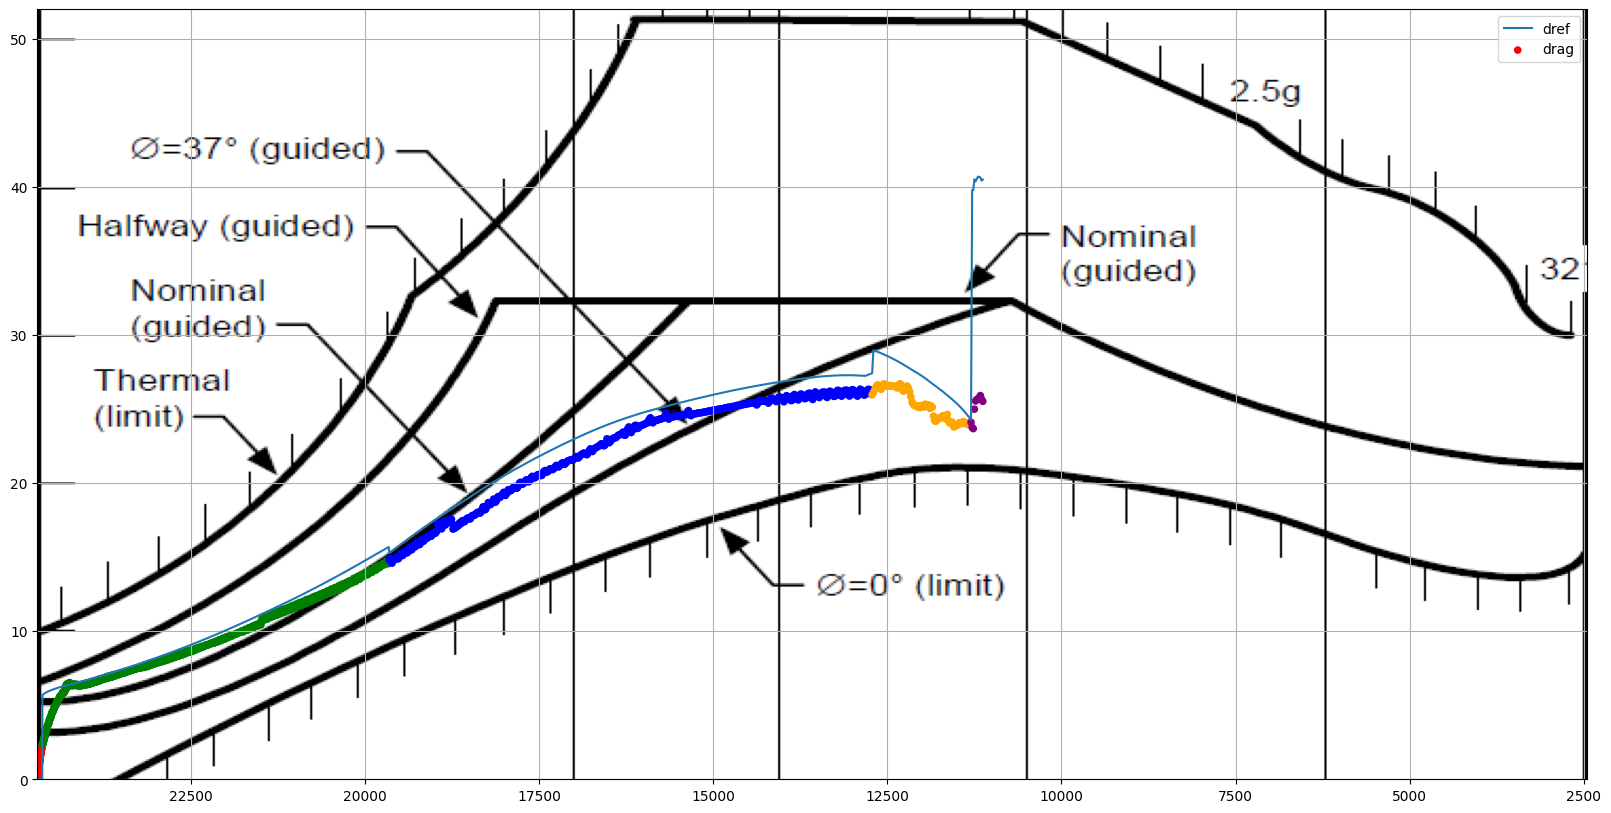

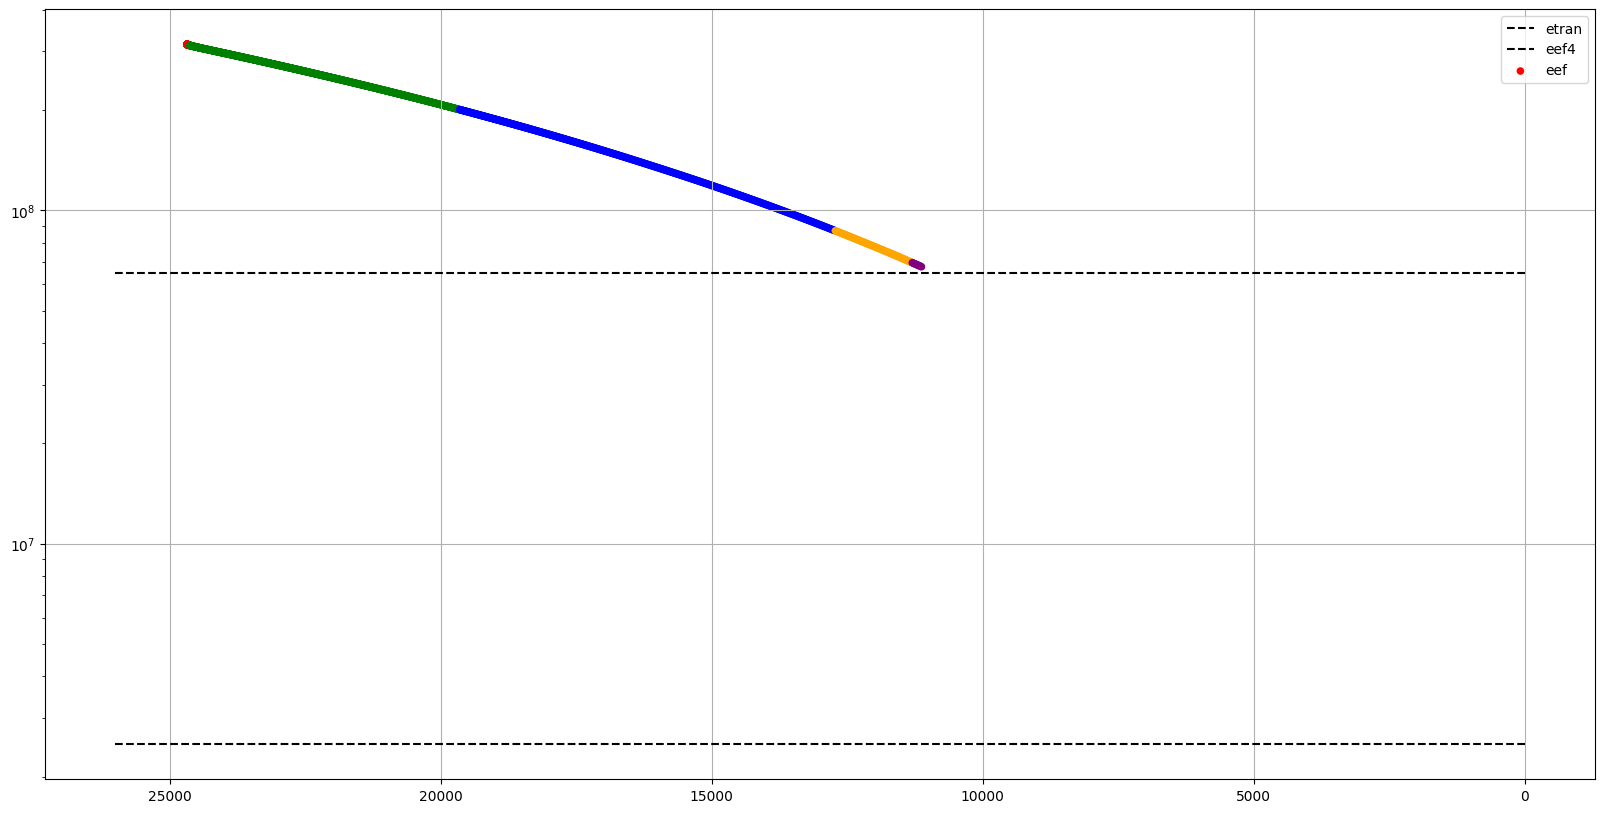

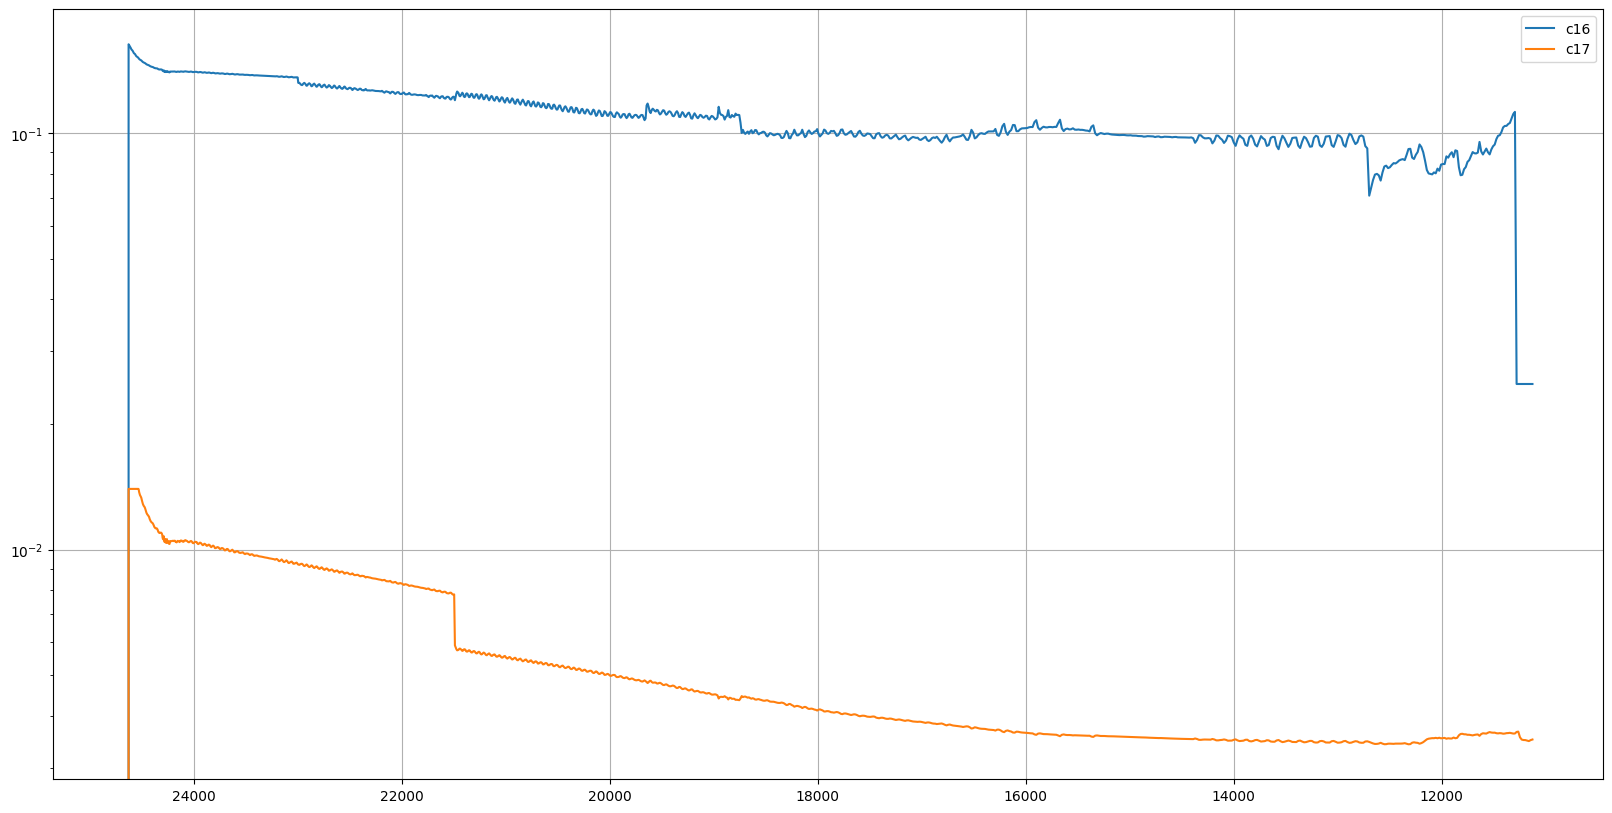

In [72]:
def entry_plots(data):
    
    plt.figure(figsize=(20, 10))
    
    rangekm = data['trange'] / 0.539957

    plt.scatter(data['ve'], rangekm, s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5 , label='alpha')
    
    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()
    
    
    
    sin_B = data['delaz'].apply(lambda az: math.sin(math.radians(az))).to_numpy()
    sin_c = rangekm.apply(lambda r : math.sin(r / 6371) ).to_numpy()
    xr = np.arcsin(np.multiply(sin_B, sin_c)) * 6371


    plt.figure(figsize=(20, 10))
    plt.scatter(data['ve'], xr, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5)

    plt.grid()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()
    
    

    plt.figure(figsize=(20, 10))

    plt.plot(data['ve'], data['alpcmd'], label='alpcmd')
    plt.plot(data['ve'], data['aclam'], '--', c='k', label='alpha lim')
    plt.plot(data['ve'], data['aclim'], '--', c='k')
    plt.scatter(data['ve'], data['alpha'], s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5 , label='alpha')
    
    plt.ylim([0, 45])
    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()



    plt.figure(figsize=(20, 10))

    plt.plot(data['ve'], data['rolcmd'], label='rolcmd')
    plt.plot(data['ve'], data['rollc_2'], label='unlimited roll')
    plt.plot(data['ve'], data['rollc_3'], label='roll ref')
    plt.plot(data['ve'], -data['rlm'], '--', c='k', label='rlm')
    plt.plot(data['ve'], data['rlm'], '--', c='k')
    plt.scatter(data['ve'], data['roll'], s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='roll')

    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()


    plt.figure(figsize=(20, 10))

    plt.plot(data['ve'], data['lodv'], label='lodv')
    plt.plot(data['ve'], data['lmn'], '--', label='lmn', c='k')
    plt.plot(data['ve'], data['lmn'] / data['xlod'], '--', c='k')
    plt.plot(data['ve'], data['lod'], ':',  label='lod')
    plt.scatter(data['ve'], data['lod'] * np.cos(np.deg2rad(data['roll'])), s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='vert lod')

    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()

    plt.figure(figsize=(20, 10))

    plt.plot(data['ve'], data['rdtrf'], label='hdref')
    plt.plot(data['ve'], data['rdtref'], label='rdtref')
    plt.plot(data['ve'], data['dlrdot'], label='dlrdot')
    plt.plot(data['ve'], data['rdtrf'] + data['dlrdot'], label='hdreft_plus_fdbk')
    plt.scatter(data['ve'], data['rdot'] , s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='hdot')

    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    plt.grid()


    plt.figure(figsize=(20, 10))

    img = plt.imread("drag2.png")
    plt.imshow(img, aspect='auto', extent=[24700, 2450, -1.45, 60.2], alpha=1 , cmap='Greys_r');

    plt.plot(data['ve'], data['drefp'], label='dref')
    plt.scatter(data['ve'], data['drag'] , s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='drag')

    plt.ylim([0, 52])
    
    plt.legend()
    ax = plt.gca()
    plt.grid()


    plt.figure(figsize=(20, 10))

    plt.hlines(6.502262e7, 26000, 0, 'k', '--', label='etran')
    plt.hlines(2.5e6, 26000, 0, 'k', '--', label='eef4')
    plt.scatter(data['ve'], data['eef'] , s=20, c=data['islect'], cmap=entry_phase_color_map, vmin=1, vmax=5, label='eef')

    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    ax.set_yscale('log')
    plt.grid()
    
    plt.figure(figsize=(20, 10))

    plt.plot(data['ve'], data['c16'], label='c16')
    plt.plot(data['ve'], data['c17'], label='c17')
    
    plt.legend()
    ax = plt.gca()
    ax.invert_xaxis()
    ax.set_yscale('log')
    plt.grid()
    
    
entry_plots(data_entry)